Churn Analysis for Telecom Industry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format 


In [2]:
df= pd.read_csv('TelcoChurn.csv')
df.shape

(7043, 21)

## Data Exploration

In [3]:
df[:1].T

,0
customerID,7590-VHVEG
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No


In [4]:
df.select_dtypes(include=['O'])[:1].T


,0
customerID,7590-VHVEG
gender,Female
Partner,Yes
Dependents,No
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No
OnlineBackup,Yes
DeviceProtection,No


In [5]:
#here TotalCharges is an object, we need to convert it to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [9]:
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)

In [10]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [11]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
0,0.128995,37.650010,61.307408,2555.344141
1,0.254682,17.979133,74.441332,1531.796094


In [12]:
# Insights:
#     25% of the churned users were senior citizens
#     Tenure of churned users is lower than non churned users
#     Total charges of churned uses are less as with non churned users
    

In [13]:
#lets see this for other catagorical variables
df.groupby('gender').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
gender,,,,,
Female,0.163078,32.290841,65.216652,2283.190985,0.269595
Male,0.161736,32.550296,64.387546,2283.407861,0.262046


In [14]:
df.groupby('Partner').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
Partner,,,,,
No,0.156362,23.370706,61.956472,1584.960429,0.329761
Yes,0.168877,42.129089,67.845977,3032.271648,0.197171


In [15]:
df.groupby('Dependents').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
Dependents,,,,,
No,0.213055,29.806000,67.002808,2187.709254,0.312791
Yes,0.043354,38.569319,59.617032,2507.955669,0.155312


In [16]:
df.to_csv('telco.csv')

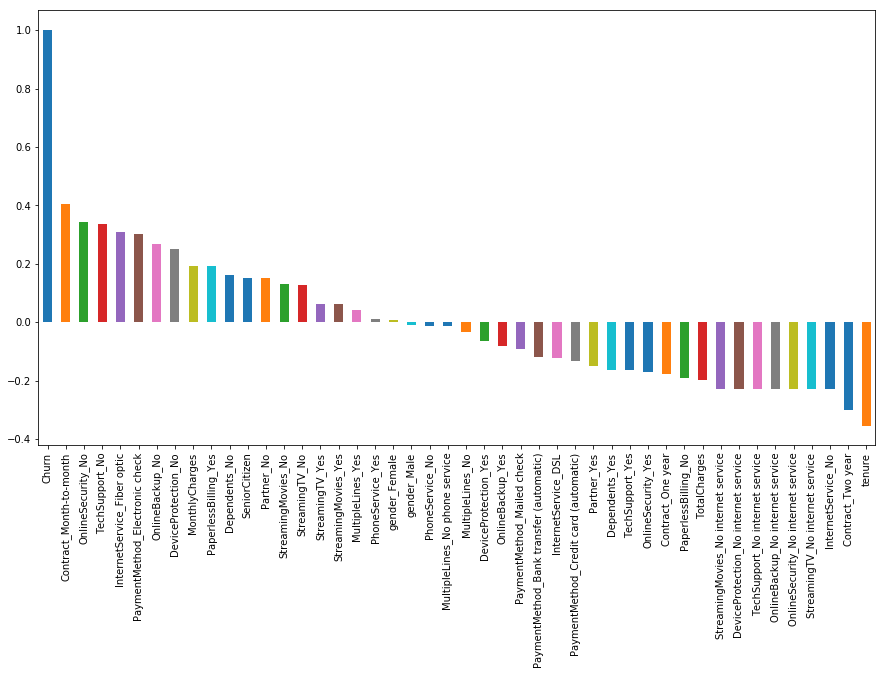

In [72]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.



# Data Exploration



Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

1.) Demographics - Let us first understand the gender, age range, patner and dependent status of the customers

Gender Distribution - About half of the customers in our data set are male while the other half are female

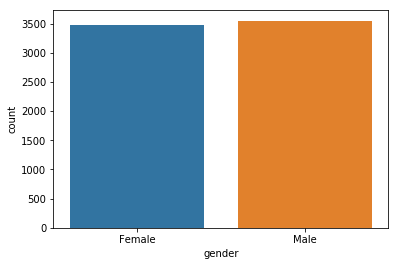

In [76]:
sns.countplot(df['gender'])

Senior Citizen 16.24 %
Other Citizen 83.76 %


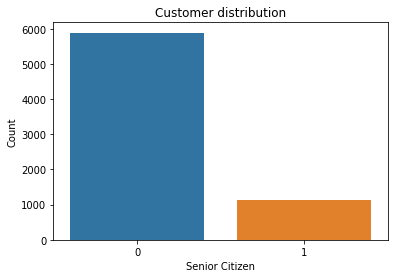

In [81]:

sns.countplot(df.SeniorCitizen)
plt.title('Customer distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

print("Senior Citizen {0:.2f} %".format((df.SeniorCitizen.value_counts()/len(df.SeniorCitizen)*100)[1]))
print("Other Citizen {0:.2f} %".format((df.SeniorCitizen.value_counts()/len(df.SeniorCitizen)*100)[0]))

Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Partner 48.25 %
No Partner 51.75 %


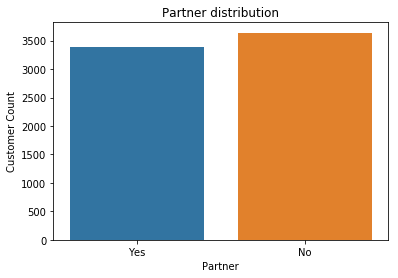

In [80]:
sns.countplot(df.Partner)
plt.title('Partner distribution')
plt.xlabel('Partner')
plt.ylabel('Customer Count')
print("Partner {0:.2f} %".format((df.Partner.value_counts()/len(df.Partner)*100)[1]))
print("No Partner {0:.2f} %".format((df.Partner.value_counts()/len(df.Partner)*100)[0]))

Dependents 29.85 %
No Dependents 70.15 %


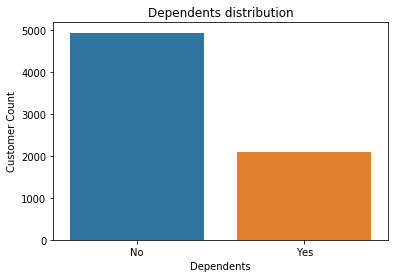

In [82]:
sns.countplot(df.Dependents)
plt.title('Dependents distribution')
plt.xlabel('Dependents')
plt.ylabel('Customer Count')
print("Dependents {0:.2f} %".format((df.Dependents.value_counts()/len(df.Dependents)*100)[1]))
print("No Dependents {0:.2f} %".format((df.Dependents.value_counts()/len(df.Dependents)*100)[0]))

Insights: 50 % people have dependents nut only 30% have dependents

Checking now the people who have both Partners and dependents

Dependents 29.85 %
No Dependents 70.15 %


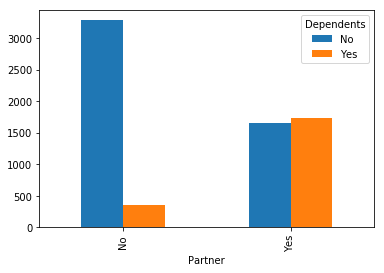

In [84]:
df.groupby(['Partner', 'Dependents']).size().unstack().plot(kind='bar')
print("Dependents {0:.2f} %".format((df.Dependents.value_counts()/len(df.Dependents)*100)[1]))
print("No Dependents {0:.2f} %".format((df.Dependents.value_counts()/len(df.Dependents)*100)[0]))


In [85]:
df.groupby(['Partner', 'Dependents']).size().unstack()

Dependents,No,Yes
Partner,,
No,3280,359
Yes,1653,1740


Its observed that around 50 % people who have partners have dependents and pepl who dont have partner dosent have dependents

<b>2. Visulaization Account details</b>

Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'# of Customers by their tenure')

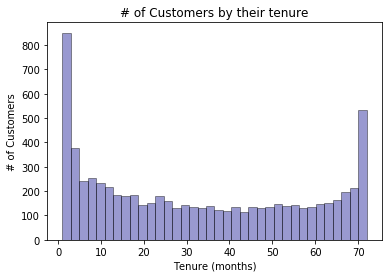

In [89]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

2. Contracts: To understand the above graph, lets first look at the # of customers by different contracts.

Text(0.5,1,'# of Customers by Contract Type')

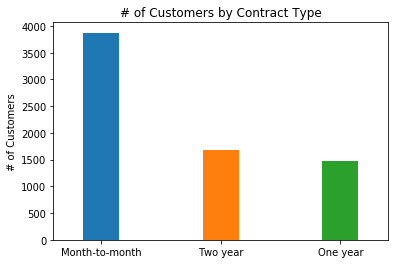

In [91]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')


As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Two Year Contract')

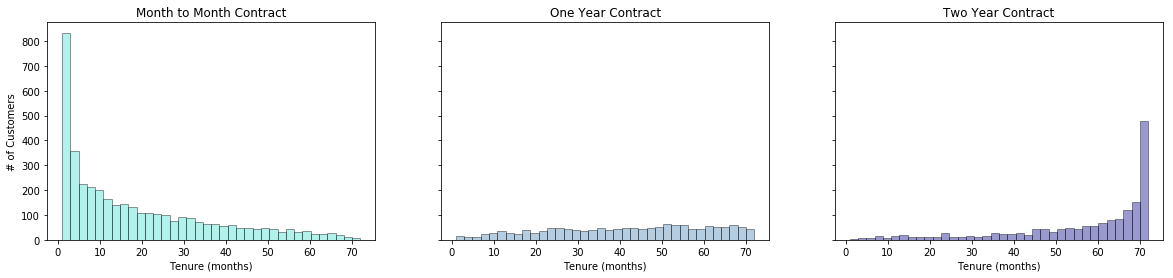

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,4))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

<b>3. Let us now look at the distribution of various services used by customers</b>

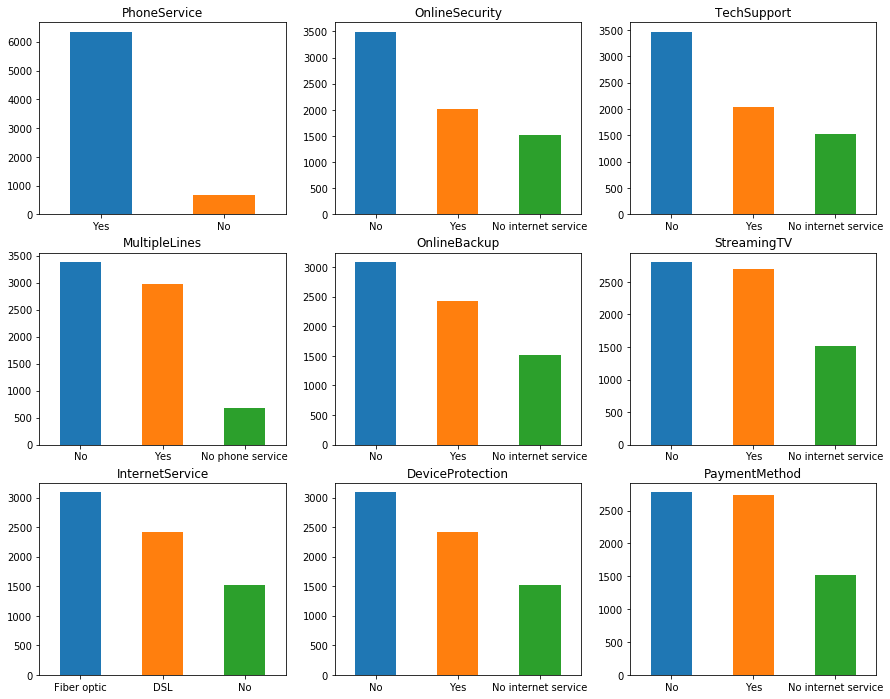

In [94]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaymentMethod']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

Churned 26.58 %
Not Churned 73.42 %


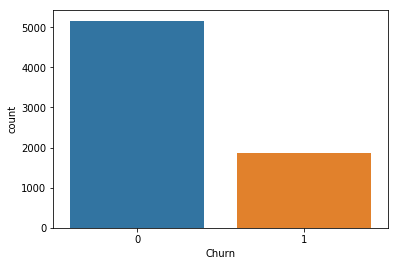

In [95]:
sns.countplot(df['Churn'])

print("Churned {0:.2f} %".format((df.Churn.value_counts()/len(df.Churn)*100)[1]))
print("Not Churned {0:.2f} %".format((df.Churn.value_counts()/len(df.Churn)*100)[0]))


In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

i.) Churn vs Tenure: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

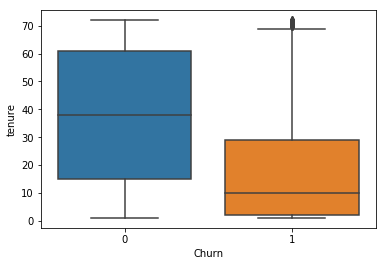

In [97]:
sns.boxplot(x = df.Churn, y = df.tenure)

ii.) Churn by Contract Type: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate

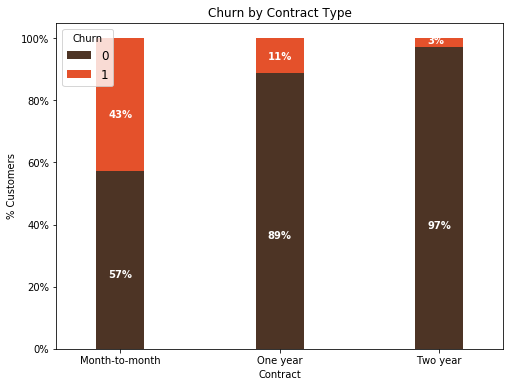

In [99]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')
    

iii.) Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.

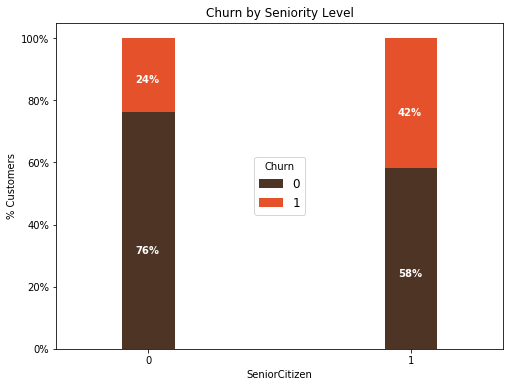

In [96]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

iv.) Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

In [102]:
dfy = df[df.Churn == 1] #dfy : dataframe churn : yes

dfn = df[df.Churn == 0] #dfn : dataframe churn : no

trace0 = go.Histogram(
    x = dfy.TotalCharges,
    name = 'Not Churned',
    marker=dict(color='green'))

trace1 = go.Histogram(
    x = dfn.TotalCharges,
    name = 'Churned',
    marker=dict(color='red'))

layout = go.Layout(title = 'Total Charges of Customers',
                   xaxis=dict(title='Total Charges'),
                   yaxis=dict( title='Count'),
                   )
data = [trace0,trace1]

fig = go.Figure(data=data, layout=layout)

iplot(fig)

v.) Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.

In [101]:
trace0 = go.Histogram(
        x = dfy.MonthlyCharges,
    name = 'Not Churned',
    marker=dict(color='green'))

trace1 = go.Histogram(
    x = dfn.MonthlyCharges,
    name = 'Churned',
    marker=dict(color='red'))

layout = go.Layout(title = 'Total Monthly Charges of Customers',
                   xaxis=dict(title='Total Monthly Charges'),
                   yaxis=dict( title='Count'),
                   )
data = [trace0,trace1]

fig = go.Figure(data=data, layout=layout)

iplot(fig) #high % of users churn when charges were high

# Modeling

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df2 = df.iloc[:,1:] #remove cust Id
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import log_loss, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
X = df_dummies.loc[:, df_dummies.columns != 'Churn']
y = df_dummies.loc[:, df_dummies.columns == 'Churn']

In [23]:
X.shape, y.shape

((7032, 45), (7032, 1))

In [24]:
df_dummies.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [27]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [28]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [46]:
# y.Churn.value_counts()

In [29]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print('ROC AUC of logistic regression classifier: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.8076
ROC AUC of logistic regression classifier: 0.7185


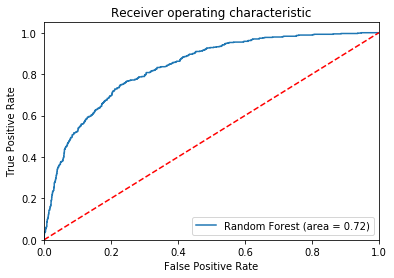

0.718545497969907


In [36]:
#log reg
rf_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()
print(rf_roc_auc)


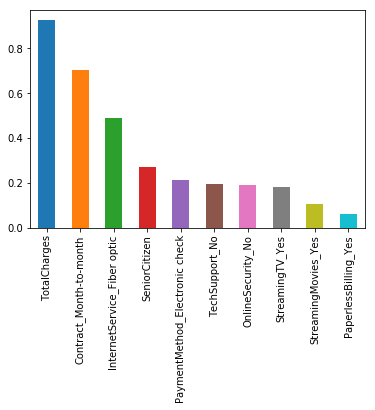

In [83]:
weight=pd.Series(logreg.coef_[0], index= X.columns.values)

weight.sort_values(ascending=False)[:10].plot(kind='bar')

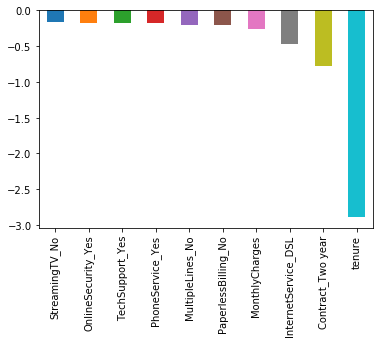

In [93]:
weight.sort_values(ascending=False).tail(10).plot(kind='bar')

In [37]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier : {:.4f}'.format(dt.score(X_test, y_test)))
print('ROC AUC Score of Decision Tree classifier: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy of Decision Tree classifier : 0.7194
ROC AUC Score of Decision Tree classifier: 0.6478


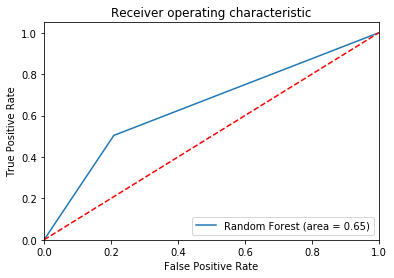

In [40]:
#decision tree
rf_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()


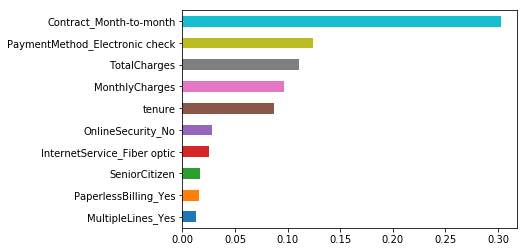

In [94]:
importances = dt.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


In [41]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred = rf.predict(X_test)
print('Accuracy of random Forest classifier on test set: {:.4f}'.format(rf.score(X_test, y_test)))
print('AUC ROC random forest classifier: {:.4f}'.format(rf.score(X_test, y_test)))

Accuracy of random Forest classifier on test set: 0.7919
AUC ROC random forest classifier: 0.7919


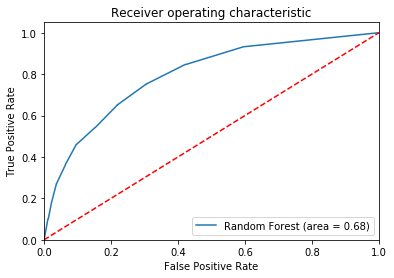

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

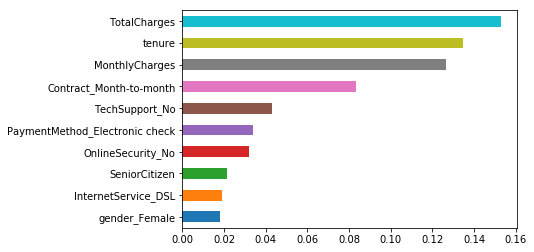

In [48]:
importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [53]:
v_clf= VotingClassifier(estimators= [('Logistic regression',logreg),('Decision Tree', dt),('Random Forest',rf)],\
                         voting='hard')

In [54]:
v_clf.fit(X_train, y_train)
y_pred_hard = v_clf.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print('Accuracy of Hard voting classifier',accuracy_hard)

Accuracy of Hard voting classifier 0.7909952606635071


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
s_clf= VotingClassifier(estimators= [('Logistic regression',logreg),('Decision Tree', dt),('Random Forest',rf)],\
                         voting='soft')
s_clf.fit(X_train, y_train)
y_pred_soft = s_clf.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print('Accuracy of Soft voting classifier',accuracy_soft)

Accuracy of Soft voting classifier 0.7592417061611374


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
ada_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [43]:
y_pred=ada_clf.predict(X_test)

In [57]:
print('Accuracy of Adaboost classifier on test set: {:.4f}'.format(ada_clf.score(X_test, y_test)))

print('AUC ROC of Adaboost classifier on test set: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy of Adaboost classifier on test set: 0.8062
AUC ROC of Adaboost classifier on test set: 0.6818


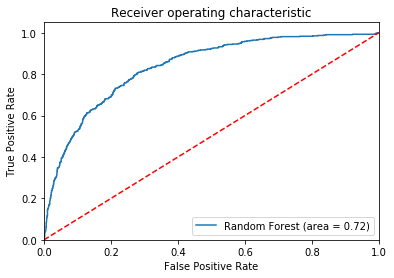

In [58]:
#dada boosting
rf_roc_auc = roc_auc_score(y_test, ada_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ada_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()